Вам необходимо провести анализ одного из реальных источников данных,используя Python и соответствующие библиотеки для анализа данных.

1. Ознакомьтесь с выбранным набором данных. Посчитайте количество строк и столбцов

2. Проведите разведочный анализ, тоесть<br>
a. для каждой числовой переменной вычислите:
*   Долю пропусков
*   Максимальное и минимальное значение
*   Среднее значение
*   Медиану
*   Дисперсию

   b. для каждой категориальной переменной вычислите:
*   Долю пропусков
*   Количество уникальных значений

3. Постройте минимум 1 информативный график, который будет полезен для анализа.Сформулируйте выводы.

4. Сформулируйте и проверьте минимум 1 статистическую гипотезу. Выбор критериев для проверки гипотезы требуется обосновать. Сделать выводы в терминах предметной области.

**Решение**
---

В рамках аттестационной работы была выбран дата сет - Список высокооплачиваемых спортсменов Forbes.
https://www.kaggle.com/datasets/parulpandey/forbes-highest-paid-athletes-19902019

**Далее следует код в рамках решения заданий.**

<br>
**Выводы по графикам:**

---

*Выводы по графику "Атлеты из разных стран"*:<br>
Из построенного графика видно, что большинство спортсменнов, состоящие в списке выокооплачиваемых спортсменнов Forbes - граждане США. Меньше всего спортсменов из стран: Россия, Сербия, Испания и Австрия.

---

*Выводы по графику "Общий заработок по странам"*:<br>
Из построенного графика видно, что первая пятерка стран, чьи спортсмены заработали больше всего за все время из: США, Швейцария, Португалия, Германия, Аргентина. Далее идут по доходу идут такие страны как Бразилия и Англия.

---

*Выводы по графику "Общий заработок спортсменов за все время"*:<br>
Из построенного графика видно, что с каждым промежутком в 5 лет доход спортсменов только рос. Вероятнее всего это связано с развитием индустрии спорта (в каждой дисциплине), общего экономического положения. Так, например, у более известных спортсменов доход строится не только из полученных денег за выступления, но и из рекламных контрактов. Особенно это касается футбола, баскетбола и бокса. Это можно увидеть по последнему графику.

---

*Выводы по графику "Доход по спортивным дисциплинам"*:<br>
Как уже было сказано выше, больше всего спортсмены заработали в рамках дисциплин Баскетбол, футбол и бокс.

---

<br>
**Статистическая гипотеза.**<br>
Выясним, является ли футбол спортивной дисциплиной, в которой спортсмен (в перспективе) может заработать больше, чем в спортивной дисциплине Баскетбол.

Для этого будет следовать следующему алгоритму:<br>

---

1.   *Проверим данные на нормальность распределения данных.*<br>

2.   *Проанализируем полученыне результаты: если p-value больше уровня значимости, то данные можно считать нормально распределенными, в противном случае - наоборот.*<br>

3.   *Из полученных результатов выберем подходящий нам способ (критерий) определения дисциплины, в которой можно преуспеть в рамках дохода денеждных средств*<br>

---

Из полученных результатов, можно сделать вывод, что наше предположение подтвердилось. Действительно, в футболе (в перспективе) спортсмен может заработать больше, чем баскетболе.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Количество строк: 301
Количество столбцов: 8

Доля пустых ячеек в столбце Current Rank: 0.00%
Максимальное значение в столбце Current Rank: 10
Минимальное значение в столбце Current Rank: 1
Среднее значение в столбце Current Rank: 5.4485049833887045
Медиана в столбце Current Rank: 5.0
Дисперсия в столбце Current Rank: 8.128172757475083

Доля пустых ячеек в столбце earnings ($ million): 0.00%
Максимальное значение в столбце earnings ($ million): 300.0
Минимальное значение в столбце earnings ($ million): 8.1
Среднее значение в столбце earnings ($ million): 45.51627906976744
Медиана в столбце earnings ($ million): 39.0
Дисперсия в столбце earnings ($ million): 1123.948234108527

Доля пустых ячеек в столбце Year: 0.00%
Максимальное значение в столбце Year: 2020
Минимальное значение в столбце Year: 1990
Среднее значение в столбце Year: 2005.1229235880398
Медиана в

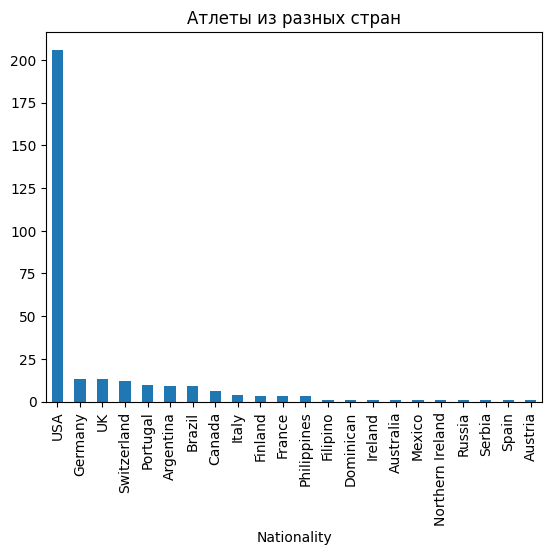

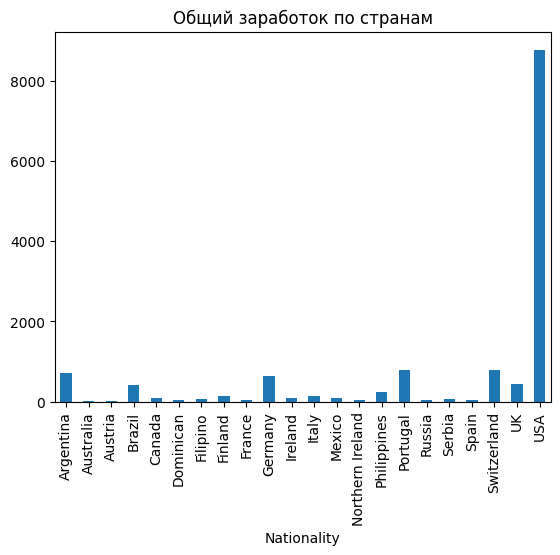

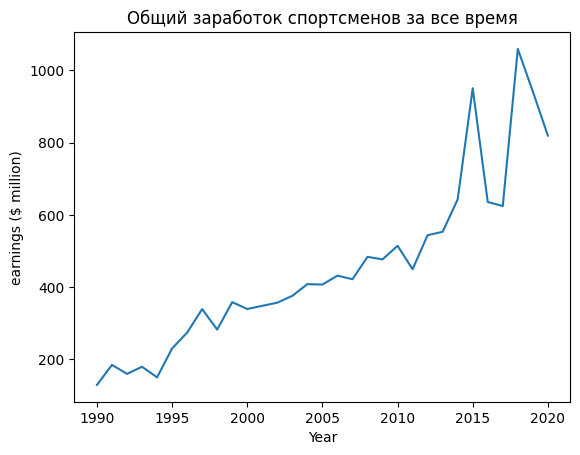

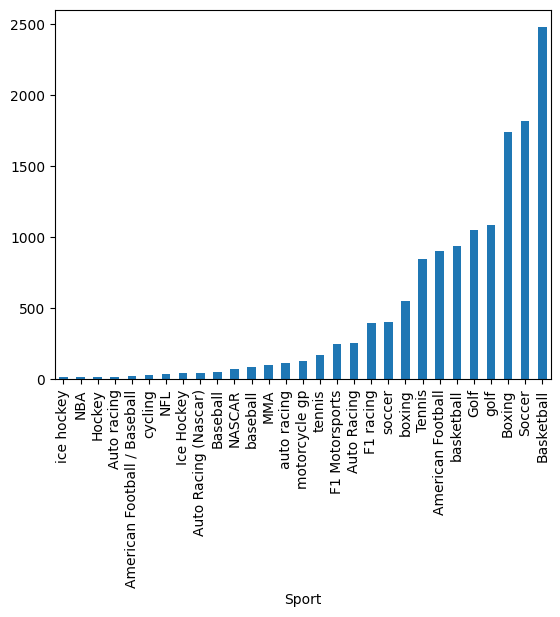

Данные выборки 'A' могут соответствовать нормальному распределению
Данные выборки 'B' могут соответствовать нормальному распределению

Обе выборки нормально распределенны. Использование t-критерия Стьюдента...
t-статистика: 8.890575218989184
p-значение: 1.2357991139613471e-11
Различия между выборками статистически значимы.
Спортивная дисциплина Футбол - более оплачиваема чем Баскетбол.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

# Аутентификации в Google
from google.colab import drive
drive.mount("/content/drive")
path = "/content/drive/MyDrive/Инополис/Промежуточная аттестация/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv"

# Получение data frame с колонками числовых значений
def getNumericalDataFrame(df):
    numerical = df.select_dtypes(include='number').columns
    return df[numerical]


# Получение анализа фрейма числовых значений
def getAnalysisNumericColumns(df):
    result = ''
    columnsSet = set(df.columns.tolist())
    for column in columnsSet:
        result += f'\n{getPercentageEmptyCells(df, column)}\n'
        result += f'Максимальное значение в столбце {column}: {df[column].max()}\n'
        result += f'Минимальное значение в столбце {column}: {df[column].min()}\n'
        result += f'Среднее значение в столбце {column}: {df[column].mean()}\n'
        result += f'Медиана в столбце {column}: {df[column].median()}\n'
        result += f'Дисперсия в столбце {column}: {df[column].var()}\n'
    return result


# Получение data frame с колонками категориальных значений
def getCategoricalAnalysis(df):
    categorical = df.select_dtypes(exclude='number').columns
    return df[categorical].drop('Previous Year Rank', axis=1)


# Получение анализа фрейма категориальных значений
def getAnalysisCategoricalColumns(df):
    result = ''
    columnsSet = set(df.columns.tolist())
    for column in columnsSet:
        result += f'\n{getPercentageEmptyCells(df, column)}\n'
        result += f'Количество уникальных значений для столбца {column}: {df[column].nunique()}\n'
    return result


# Получение доли пропусков в стобце (доля пустых ячеек)
def getPercentageEmptyCells(df, columnName):
    emptyCellsCount = df[columnName].isnull().sum()
    totalCellsCount = len(df[columnName])
    emptyCellsRatio = emptyCellsCount / totalCellsCount
    return str(f"Доля пустых ячеек в столбце {columnName}: "
               f"{emptyCellsRatio * 100:.2f}%")


# Проверка гипотезы о том, что данные взяты из нормально распределённой совокупности
def checkingDistributionData(dataA, dataB):
    statShapiroA, pValueShapiroA = shapiro(dataA)
    isNormalAMethod = pValueShapiroA > 0.05
    if isNormalAMethod:
        print("Данные выборки 'A' могут соответствовать нормальному распределению")
    else:
        print("Данные выборки 'A' не соответствуют нормальному распределению")

    statShapiroB, pValueShapiroB = shapiro(dataB)
    isNormalBMethod = pValueShapiroB > 0.05
    if isNormalBMethod:
        print("Данные выборки 'B' могут соответствовать нормальному распределению")
    else:
        print("Данные выборки 'B' не соответствуют нормальному распределению")

    return [isNormalAMethod, isNormalBMethod]


# t-критерий Стьюдента
def testOfStudent(dataA, dataB):
    t_stat, p_value = ttest_ind(dataA, dataB)
    print("t-статистика:", t_stat)
    print("p-значение:", p_value)

    if p_value < 0.05:
        print("Различия между выборками статистически значимы.")
    else:
        print("Различия между выборками статистически не значимы.")

    if t_stat < 0:
        print("Спортивная дисциплина Баскетбол - более оплачиваема чем Футбол.")
    else:
        print("Спортивная дисциплина Футбол - более оплачиваема чем Баскетбол.")


# u-критерий Манна-Уитни
def testMannwhitneyu(dataA, dataB, significanceLevel):
    stat, p = mannwhitneyu(dataA, dataB)

    print("Статистика:", stat)
    print("p-значение:", p)

    if p < significanceLevel:
        print("Различия между выборками статистически значимы.")
    else:
        print("Различия между выборками статистически не значимы.")

    if stat < 0:
        print("Спортивная дисциплина Баскетбол - более оплачиваема чем Футбол.")
    else:
        print("Спортивная дисциплина Футбол - более оплачиваема чем Баскетбол.")


df = pd.read_csv(path)
rowCount, columnsCount = df.shape
print(f'Количество строк: {rowCount}\n'
      f'Количество столбцов: {columnsCount}')

print(getAnalysisNumericColumns(getNumericalDataFrame(df)))
print(getAnalysisCategoricalColumns(getCategoricalAnalysis(df)))

df.groupby("Nationality")["S.NO"].count().sort_values(ascending=False).plot(kind='bar')
plt.title("Атлеты из разных стран")
plt.show()

df.groupby("Nationality")["earnings ($ million)"].sum().plot(kind="bar")
plt.title("Общий заработок по странам")
plt.show()

plt.plot(df.groupby("Year")["earnings ($ million)"].sum())
plt.xlabel('Year')
plt.ylabel('earnings ($ million)')
plt.title('Общий заработок спортсменов за все время')
plt.show()

df.groupby("Sport")["earnings ($ million)"].sum().sort_values().plot(kind="bar")
plt.show()

# Доход футболистов за все время
earningsFootballPlayers = df[df['Sport'] == 'Soccer']['earnings ($ million)'].tolist()
# Доход баскетоболистов за все время
earningsBasketballPlayers = df[df['Sport'] == 'basketball']['earnings ($ million)'].tolist()

distributionData = checkingDistributionData(earningsFootballPlayers, earningsBasketballPlayers)
distributionFootball = distributionData[0]
distributionBasketball = distributionData[1]

if (distributionFootball == True) and (distributionBasketball == True):
    print("\nОбе выборки нормально распределенны. Использование t-критерия Стьюдента...")
    testOfStudent(earningsFootballPlayers, earningsBasketballPlayers)
else:
    print("\nОбе выборки нормально не распределены. Использование u-критерий Манна-Уитни... ")
    testMannwhitneyu(earningsFootballPlayers, earningsBasketballPlayers)